In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read in data
df = pd.read_csv("match_samps.csv")
df2 = df.drop(["stats.name", "matchId", "assetsId", "matchType", "stats.deathType", "map", "stats.rank", "stats.playerId"], axis=1)
value_count = df2['gameMode'].value_counts()
df_value_counts = pd.DataFrame(value_count)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['gameMode', 'num_games_played']
df3 = df2[df2['gameMode']=="solo"]
def f(row):
    if row['stats.winPlace'] <= 5:
        val = 1
    else:
        val = 0

    return val
df3['top_five'] = df.apply(f, axis=1)
df3


<ipython-input-2-92f73df77a02>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['top_five'] = df.apply(f, axis=1)


,gameDuration,gameMode,stats.DBNOs,stats.assists,stats.boosts,stats.damageDealt,stats.headshotKills,stats.heals,stats.killPlace,stats.killStreaks,...,stats.rideDistance,stats.roadKills,stats.swimDistance,stats.teamKills,stats.timeSurvived,stats.vehicleDestroys,stats.walkDistance,stats.weaponsAcquired,stats.winPlace,top_five
286,2214,solo,0.0,0.0,0.0,100.000000,0.0,0.0,37.0,1.0,...,0.0000,0.0,0.0,0.0,1028.0,0.0,268.854000,0.0,63.0,0
287,2214,solo,0.0,0.0,0.0,0.000000,0.0,0.0,90.0,0.0,...,0.0000,0.0,0.0,0.0,789.0,0.0,28.123253,0.0,88.0,0
288,2214,solo,0.0,0.0,4.0,427.098080,1.0,0.0,4.0,1.0,...,2323.3994,0.0,0.0,0.0,1229.0,0.0,1692.429000,4.0,21.0,0
289,2214,solo,0.0,0.0,4.0,199.413650,0.0,0.0,28.0,1.0,...,0.0000,0.0,0.0,0.0,1647.0,0.0,1688.476400,0.0,31.0,0
290,2214,solo,0.0,0.0,0.0,25.199999,0.0,0.0,44.0,0.0,...,4562.7593,0.0,0.0,0.0,1629.0,0.0,1043.243900,13.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20576,2150,solo,0.0,0.0,0.0,43.537500,0.0,0.0,67.0,0.0,...,0.0000,0.0,0.0,0.0,1294.0,0.0,964.296140,0.0,58.0,0
20577,2150,solo,0.0,0.0,0.0,13.545000,0.0,0.0,89.0,0.0,...,0.0000,0.0,0.0,0.0,851.0,0.0,231.469160,0.0,89.0,0
20578,2150,solo,0.0,0.0,3.0,438.063300,1.0,1.0,2.0,1.0,...,0.0000,0.0,0.0,0.0,1546.0,0.0,4143.685500,3.0,1.0,1
20579,2150,solo,0.0,0.0,6.0,100.000000,0.0,0.0,24.0,1.0,...,0.0000,0.0,0.0,0.0,1838.0,0.0,4439.742000,0.0,22.0,0


In [3]:
df4 = df3.drop(columns=["gameMode"])

In [4]:
df4['stats.kills'].describe()

count    3829.000000
mean        0.866806
std         1.549773
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        18.000000
Name: stats.kills, dtype: float64

In [5]:
df4['stats.kills'].max()
# max num of kills in this data set

18.0

In [6]:
X = df4[["stats.damageDealt", "stats.walkDistance", "stats.timeSurvived", "stats.heals", "stats.boosts", "stats.kills","stats.weaponsAcquired", "stats.rideDistance"]]
y = df4["stats.winPlace"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3829, 8) (3829, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6294461587344407
Testing Score: 0.6240804785377865


Text(0.5, 1.0, 'Residual Plot')

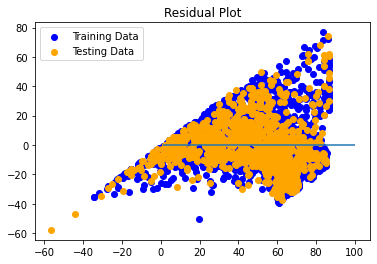

In [10]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [12]:
algo = "Linear Regression"
score_df = pd.DataFrame(columns=["Algorithm", "Accuracy"])
score_df = score_df.append(pd.Series([algo, testing_score], index=["Algorithm","Accuracy"]), ignore_index=True)
score_df.index.rename("Rank", inplace=True)
score_df

,Algorithm,Accuracy
Rank,,
0,Linear Regression,0.62408


In [15]:
score_df.to_csv('DataTrav/score2.csv', mode='a', header=False)